# 1) Importings

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device


'cuda'

## 1.1) Preparing Normalaization

In [3]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

In [4]:
train_data = CIFAR10(root='data',
                     train=True,
                     transform=train_transform,
                     target_transform=None,
                     download=True,
                     )

test_data = CIFAR10(root='data',
                    train=False,
                    transform=test_transform,
                    target_transform=None,
                    download=True)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
train_data, test_data


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ))

In [6]:
img , label = train_data[0]
img , label

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [7]:
img.shape

torch.Size([3, 32, 32])

In [6]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# 2) Visualize Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


Text(0.5, 1.0, 'frog')

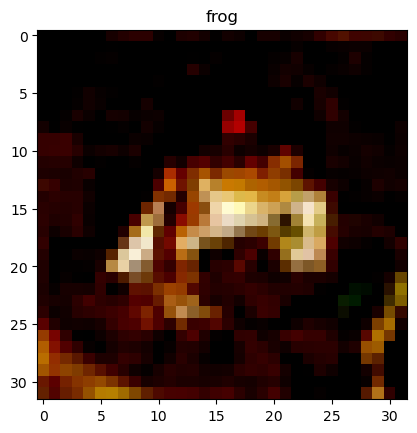

In [53]:
import matplotlib.pyplot as plt
img , label = train_data[0]
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])

## 2.1) Random **Image**

Text(0.5, 1.0, 'dog')

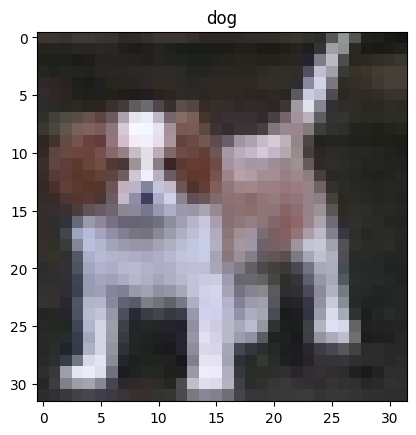

In [ ]:
random_idx=  torch.randint(0,len(train_data),size=[1]).item()
img, label = train_data[random_idx]
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])

## 2.2 ) Random **Images**

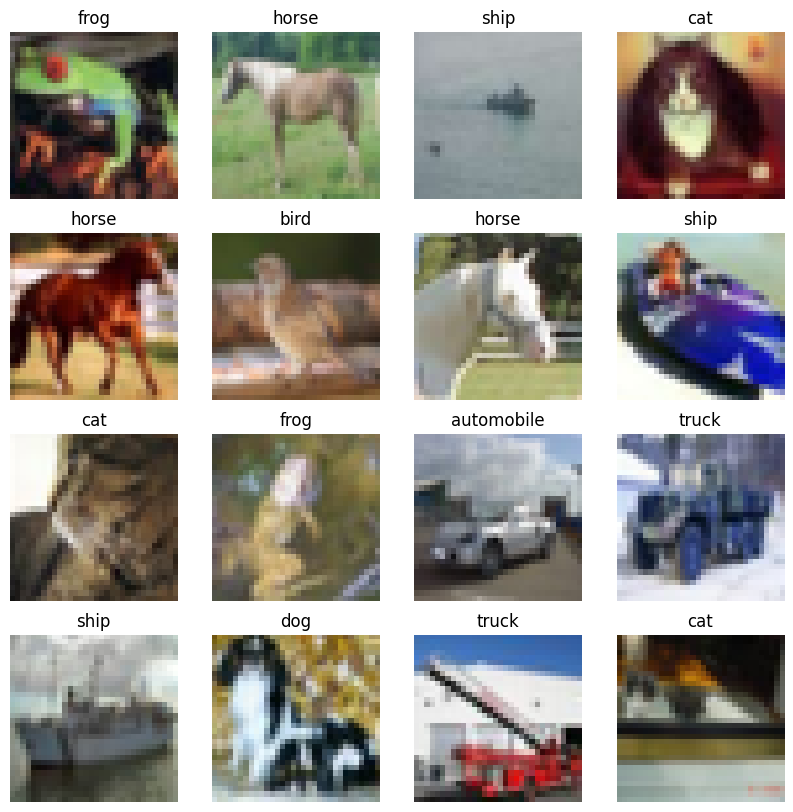

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(10,10))
row , columns = 4,4
for i in range( 1, row * columns + 1):
  random_idx = torch.randint(0,len(train_data), size =[1]).item()
  img , label = train_data[random_idx]
  fig.add_subplot(row,columns,i)
  plt.imshow(img.permute(1,2,0))
  plt.title(class_names[label])
  plt.axis(False)

# 3) Prepare Dataloader

In [7]:
BATCH_SIZE = 128

train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x20d0a244ef0>,
 <torch.utils.data.dataloader.DataLoader at 0x20d7125c200>)

AttributeError: 'DataLoader' object has no attribute 'shape'

In [9]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([128, 3, 32, 32]), torch.Size([128]))

Text(0.5, 1.0, 'dog')

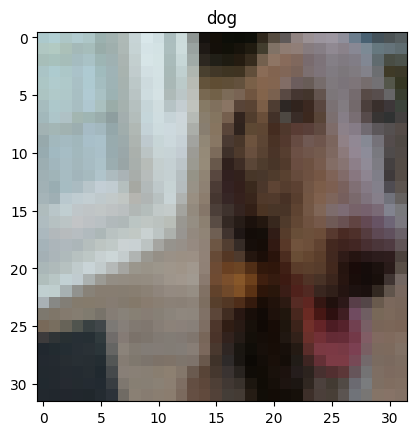

In [ ]:
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img , label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])

# 4) Building a model

In [58]:
class CIFAR10Model(nn.Module):
  def __init__(self,input_shape:int , output_shape:int, hidden_units:int):
    super().__init__()


    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape),

    )

  def forward(self , x):
    return self.layer_stack(x)

model_0 = CIFAR10Model(input_shape = 3 * 32 * 32,
                       output_shape = len(class_names),
                       hidden_units = 10)

In [ ]:
model_0

CIFAR10Model(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0040,  0.0036, -0.0088,  ...,  0.0016, -0.0048, -0.0177],
                      [-0.0019,  0.0088, -0.0021,  ...,  0.0034, -0.0036,  0.0136],
                      [-0.0179,  0.0006,  0.0080,  ..., -0.0093, -0.0026,  0.0017],
                      ...,
                      [-0.0020,  0.0048,  0.0005,  ..., -0.0109,  0.0154, -0.0071],
                      [-0.0026, -0.0009, -0.0164,  ..., -0.0142,  0.0121,  0.0033],
                      [ 0.0021,  0.0002,  0.0171,  ..., -0.0038,  0.0038, -0.0008]])),
             ('layer_stack.1.bias',
              tensor([ 0.0150, -0.0030, -0.0146,  0.0062,  0.0121, -0.0028,  0.0078,  0.0095,
                       0.0030,  0.0106])),
             ('layer_stack.2.weight',
              tensor([[ 0.0155,  0.2282, -0.2970, -0.1387,  0.2031,  0.1738,  0.2030, -0.1709,
                        0.2192, -0.0663],
                      [ 0.2630,  0.1321,  0.1942, -0.1249, -0.0803,  0.2546,  0.

# 5 ) loss function and Op and accuracy

In [11]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [12]:
from helper_functions import accuracy_fn

loss = nn.CrossEntropyLoss()

op = torch.optim.SGD(params = model_0.parameters(),
                     lr = 0.1)

# 6) Training loop

In [ ]:
device = "cpu"
device

'cpu'

In [ ]:
torch.manual_seed(42)

from tqdm.auto import tqdm

epochs = 10

for epoch in tqdm(range(epochs)):

  print(f'epoch : {epoch} ----------------------------------------------')


  train_loss , train_acc = 0 , 0

  for batch,(X,y) in enumerate(train_dataloader):

    X,y = X.to(device) , y.to(device)

    # step 0
    model_0.train()

    #step 1
    y_pred = model_0(X)

    #step 2
    ls = loss(y_pred,y)
    train_loss += ls
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #step 3
    op.zero_grad()

    #step 4
    ls.backward()

    #step 5
    op.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)


  print(f' train loss on device : {device} : {train_loss} ||| train acc on device : {device} : {train_acc}')



  #testing

  model_0.eval()
  with torch.inference_mode():

    test_loss , test_acc = 0,0

    for X,y in test_dataloader:

      X , y = X.to(device) , y.to(device)

      #step 0
      y_test = model_0(X)

      #step 1
      test_loss += loss(y_test,y)
      test_acc += accuracy_fn(y_true=y,y_pred=y_test.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f' test loss on device : {device} : {test_loss} ||| test acc on device : {device} : {test_acc}')

  0%|          | 0/10 [00:00<?, ?it/s]

epoch : 0 ----------------------------------------------
 train loss on device : cpu : 1.8319205045700073 ||| train acc on device : cpu : 35.31669865642994
 test loss on device : cpu : 1.8291407823562622 ||| test acc on device : cpu : 34.5547124600639
epoch : 1 ----------------------------------------------
 train loss on device : cpu : 1.8229089975357056 ||| train acc on device : cpu : 35.62859884836852
 test loss on device : cpu : 1.832539439201355 ||| test acc on device : cpu : 35.283546325878596
epoch : 2 ----------------------------------------------
 train loss on device : cpu : 1.8141361474990845 ||| train acc on device : cpu : 36.36836212412028
 test loss on device : cpu : 1.8215386867523193 ||| test acc on device : cpu : 35.742811501597444
epoch : 3 ----------------------------------------------
 train loss on device : cpu : 1.805384635925293 ||| train acc on device : cpu : 36.42634357005758
 test loss on device : cpu : 1.824683427810669 ||| test acc on device : cpu : 34.64456

# 7) New Model with Nonlinearity

In [ ]:
class CIFAR10ModelV1(nn.Module):
  def __init__(self, input_shape: int, output_shape: int, hidden_units:int):

    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features = output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)

model_1 = CIFAR10ModelV1(input_shape=3*32*32,
                         output_shape=len(class_names),
                         hidden_units=10)

In [ ]:
model_1

CIFAR10ModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): ReLU()
  )
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0011, -0.0123,  0.0056,  ...,  0.0145, -0.0008,  0.0139],
                      [ 0.0142, -0.0094, -0.0016,  ...,  0.0128,  0.0031,  0.0029],
                      [-0.0136,  0.0051, -0.0141,  ...,  0.0093,  0.0019, -0.0065],
                      ...,
                      [ 0.0089, -0.0075,  0.0156,  ..., -0.0092, -0.0118,  0.0133],
                      [-0.0135, -0.0114, -0.0060,  ..., -0.0054,  0.0051,  0.0114],
                      [-0.0127, -0.0168,  0.0029,  ...,  0.0044,  0.0124,  0.0095]])),
             ('layer_stack.1.bias',
              tensor([-0.0073,  0.0071, -0.0018,  0.0089,  0.0027,  0.0171,  0.0180,  0.0024,
                       0.0032, -0.0110])),
             ('layer_stack.3.weight',
              tensor([[-0.0389,  0.0937, -0.0297, -0.2319, -0.0831, -0.2620,  0.0301,  0.2470,
                       -0.1777, -0.0493],
                      [-0.0352,  0.2702, -0.2280,  0.1523, -0.1478, -0.0899, -0.

# 8) loss ad op


In [ ]:
from helper_functions import accuracy_fn

loss = nn.CrossEntropyLoss()

op = torch.optim.SGD(params = model_1.parameters(),
                     lr = 0.1)

# 9) Training and Tesing loop

In [ ]:
torch.manual_seed(42)

from tqdm.auto import tqdm

epochs = 10

for epoch in tqdm(range(epochs)):

  print(f'epoch : {epoch} ----------------------------------------------')


  train_loss , train_acc = 0 , 0

  for batch,(X,y) in enumerate(train_dataloader):

    X,y = X.to(device) , y.to(device)

    # step 0
    model_1.train()

    #step 1
    y_pred = model_1(X)

    #step 2
    ls = loss(y_pred,y)
    train_loss += ls
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #step 3
    op.zero_grad()

    #step 4
    ls.backward()

    #step 5
    op.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)


  print(f' train loss on device : {device} : {train_loss} ||| train acc on device : {device} : {train_acc}')



  #testing

  model_0.eval()
  with torch.inference_mode():

    test_loss , test_acc = 0,0

    for X,y in test_dataloader:

      X , y = X.to(device) , y.to(device)

      #step 0
      y_test = model_1(X)

      #step 1
      test_loss += loss(y_test,y)
      test_acc += accuracy_fn(y_true=y,y_pred=y_test.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f' test loss on device : {device} : {test_loss} ||| test acc on device : {device} : {test_acc}')

  0%|          | 0/10 [00:00<?, ?it/s]

epoch : 0 ----------------------------------------------
 train loss on device : cpu : 2.301178455352783 ||| train acc on device : cpu : 9.946817018554063
 test loss on device : cpu : 2.2936456203460693 ||| test acc on device : cpu : 9.954073482428115
epoch : 1 ----------------------------------------------
 train loss on device : cpu : 2.1020054817199707 ||| train acc on device : cpu : 21.78103007037748
 test loss on device : cpu : 2.079576015472412 ||| test acc on device : cpu : 23.162939297124602
epoch : 2 ----------------------------------------------
 train loss on device : cpu : 1.9844120740890503 ||| train acc on device : cpu : 26.927383237364044
 test loss on device : cpu : 2.052706241607666 ||| test acc on device : cpu : 24.470846645367413
epoch : 3 ----------------------------------------------
 train loss on device : cpu : 1.9059430360794067 ||| train acc on device : cpu : 29.138675623800385
 test loss on device : cpu : 1.882051944732666 ||| test acc on device : cpu : 28.923

# 10) CNN Model

In [ ]:
class CIFAR10ModelV2(nn.Module):
  def __init__(self, input_shape: int, output_shape: int, hidden_units:int):

    super().__init__()

    self.block_1 = nn.Sequential(

        nn.Conv2d(in_channels=3, out_channels=hidden_units,kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride =2)

    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
                nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride =2)
    )
    self.block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride =2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*4*4, out_features = output_shape)
    )
  def forward(self,x):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.block_3(x)
    x = self.classifier(x)
    return x
model_2 = CIFAR10ModelV2(input_shape=3*32*32,
                         output_shape=len(class_names),
                         hidden_units=10)

In [ ]:
model_2

CIFAR10ModelV2(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16

In [ ]:
model_2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[-0.0424, -0.0466,  0.1528],
                        [-0.1788, -0.0264, -0.0008],
                        [-0.1697,  0.0791,  0.1283]],
              
                       [[-0.1529,  0.0745, -0.0125],
                        [ 0.1803, -0.1814,  0.1634],
                        [-0.0715,  0.1622, -0.0982]],
              
                       [[ 0.0326,  0.0449,  0.1194],
                        [ 0.0902,  0.1076, -0.0405],
                        [-0.1523,  0.0022,  0.1755]]],
              
              
                      [[[ 0.1665, -0.1132,  0.1324],
                        [ 0.0866, -0.0348,  0.1050],
                        [-0.0080,  0.0234, -0.1261]],
              
                       [[-0.0237,  0.1884,  0.1192],
                        [-0.1555, -0.0109,  0.1226],
                        [-0.0824, -0.0241,  0.0960]],
              
                       [[ 0.1617,  0.1746, -0.1390],
                      

# 11) loss and op

In [ ]:
from helper_functions import accuracy_fn

loss = nn.CrossEntropyLoss()

op = torch.optim.SGD(params = model_2.parameters(),
                     lr = 0.1)

# Training and Testing

In [ ]:
torch.manual_seed(42)

from tqdm.auto import tqdm

epochs = 10

for epoch in tqdm(range(epochs)):

  print(f'epoch : {epoch} ----------------------------------------------')


  train_loss , train_acc = 0 , 0

  for batch,(X,y) in enumerate(train_dataloader):

    X,y = X.to(device) , y.to(device)

    # step 0
    model_2.train()

    #step 1
    y_pred = model_2(X)

    #step 2
    ls = loss(y_pred,y)
    train_loss += ls
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #step 3
    op.zero_grad()

    #step 4
    ls.backward()

    #step 5
    op.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)


  print(f' train loss on device : {device} : {train_loss} ||| train acc on device : {device} : {train_acc}')



  #testing

  model_0.eval()
  with torch.inference_mode():

    test_loss , test_acc = 0,0

    for X,y in test_dataloader:

      X , y = X.to(device) , y.to(device)

      #step 0
      y_test = model_2(X)

      #step 1
      test_loss += loss(y_test,y)
      test_acc += accuracy_fn(y_true=y,y_pred=y_test.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f' test loss on device : {device} : {test_loss} ||| test acc on device : {device} : {test_acc}')

# 12) improving Model

In [92]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [93]:
class CIFAR10ModelV2(nn.Module):
    def __init__(self, input_channels: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride =2)
        )
        self.block_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride =2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=hidden_units * 4 * 4,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.classifier(x)

        return x
model_3 = CIFAR10ModelV2(input_channels=3,
                         output_shape=len(class_names),
                         hidden_units=128).to(device)

In [94]:
from helper_functions import accuracy_fn

loss = nn.CrossEntropyLoss()

op = torch.optim.Adam(params = model_3.parameters(),
                     lr = 0.001)

In [95]:
torch.manual_seed(42)

from tqdm.auto import tqdm

epochs = 10

for epoch in tqdm(range(epochs)):

  print(f'epoch : {epoch} ----------------------------------------------')


  train_loss , train_acc = 0 , 0

  for batch,(X,y) in enumerate(train_dataloader):

    X,y = X.to(device) , y.to(device)

    # step 0
    model_3.train()

    #step 1
    y_pred = model_3(X)

    #step 2
    ls = loss(y_pred,y)
    train_loss += ls.item()
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #step 3
    op.zero_grad()

    #step 4
    ls.backward()

    #step 5
    op.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)


  print(f' train loss on device : {device} : {train_loss} ||| train acc on device : {device} : {train_acc}')



  #testing

  model_3.eval()
  with torch.inference_mode():

    test_loss , test_acc = 0,0

    for X,y in test_dataloader:

      X , y = X.to(device) , y.to(device)

      #step 0
      y_test = model_3(X)

      #step 1
      ls_test = loss(y_test,y)
      test_loss += ls_test.item()
      test_acc += accuracy_fn(y_true=y,y_pred=y_test.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

3    print(f' test loss on device : {device} : {test_loss} ||| test acc on device : {device} : {test_acc}')

  0%|          | 0/10 [00:00<?, ?it/s]

epoch : 0 ----------------------------------------------
 train loss on device : cuda : 1.5934975641157927 ||| train acc on device : cuda : 41.55610613810742
 test loss on device : cuda : 1.2220466106752805 ||| test acc on device : cuda : 55.83465189873418
epoch : 1 ----------------------------------------------
 train loss on device : cuda : 1.0658806528886566 ||| train acc on device : cuda : 62.0548273657289
 test loss on device : cuda : 0.9307146691068818 ||| test acc on device : cuda : 67.54351265822785
epoch : 2 ----------------------------------------------
 train loss on device : cuda : 0.8506007223482936 ||| train acc on device : cuda : 70.40041560102301
 test loss on device : cuda : 0.7515164327017868 ||| test acc on device : cuda : 73.97151898734177
epoch : 3 ----------------------------------------------
 train loss on device : cuda : 0.7113787762039457 ||| train acc on device : cuda : 75.28652493606138
 test loss on device : cuda : 0.7079936741273615 ||| test acc on device 

# 13) Make predictions

In [96]:
def make_prediction(model: torch.nn.Module , data : list , device : torch.device = device):
    pred_probs = []
    model.eval()
    for sample in data:
        sample = sample.unsqueeze(dim=0).to(device)

        pred_logits - model(sample)
        probs = torch.softmax(pred_logits, dim=1).squeeze(0).cpu()


        pred_probs.append(probs)

        return torch.stack(pred_probs)


# 14 ) Another More Complex CNN

In [8]:
class CIFAR10ModelV3(nn.Module):
    def __init__(self, input_channels: int , hidden_units_list : list ,output_shape: int):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels = hidden_units_list[0] ,kernel_size =3 ,stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units_list[0] , out_channels = hidden_units_list[0] ,kernel_size =3 ,stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2 , stride = 2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units_list[0], out_channels = hidden_units_list[1] ,kernel_size =3 ,stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units_list[1] , out_channels = hidden_units_list[1] ,kernel_size =3 ,stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2 , stride = 2)
        )
        self.block_3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units_list[1], out_channels = hidden_units_list[2] ,kernel_size =3 ,stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units_list[2] , out_channels = hidden_units_list[2] ,kernel_size =3 ,stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2 , stride = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features = hidden_units_list[2] * 4 * 4 ,out_features = output_shape),
        )
    def forward(self,x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.classifier(x)
        return x

model_4 = CIFAR10ModelV3(input_channels= 3,
                         hidden_units_list = [64,128,256],
                         output_shape= len(class_names)
                        ).to(device)

# 15) loss and op

In [9]:
from helper_functions import accuracy_fn

loss = nn.CrossEntropyLoss()

op = torch.optim.Adam(params = model_4.parameters(),
                     lr = 0.001)

# 16) traning and Testing

In [12]:
torch.manual_seed(42)

from tqdm.auto import tqdm

epochs = 10

for epoch in tqdm(range(epochs)):

  print(f'epoch : {epoch} ----------------------------------------------')


  train_loss , train_acc = 0 , 0

  for batch,(X,y) in enumerate(train_dataloader):

    X,y = X.to(device) , y.to(device)

    # step 0
    model_4.train()

    #step 1
    y_pred = model_4(X)

    #step 2
    ls = loss(y_pred,y)
    train_loss += ls.item()
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    #step 3
    op.zero_grad()

    #step 4
    ls.backward()

    #step 5
    op.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)


  print(f' train loss on device : {device} : {train_loss} ||| train acc on device : {device} : {train_acc}')



  #testing

  model_4.eval()
  with torch.inference_mode():

    test_loss , test_acc = 0,0

    for X,y in test_dataloader:

      X , y = X.to(device) , y.to(device)

      #step 0
      y_test = model_4(X)

      #step 1
      ls_test = loss(y_test,y)
      test_loss += ls_test.item()
      test_acc += accuracy_fn(y_true=y,y_pred=y_test.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f' test loss on device : {device} : {test_loss} ||| test acc on device : {device} : {test_acc}')

  0%|          | 0/10 [00:00<?, ?it/s]

epoch : 0 ----------------------------------------------
 train loss on device : cuda : 1.5494510886614279 ||| train acc on device : cuda : 42.731377877237854
 test loss on device : cuda : 1.191101169284386 ||| test acc on device : cuda : 56.58623417721519
epoch : 1 ----------------------------------------------
 train loss on device : cuda : 1.03069938265759 ||| train acc on device : cuda : 63.15377237851662
 test loss on device : cuda : 0.8850635418409034 ||| test acc on device : cuda : 68.66099683544304
epoch : 2 ----------------------------------------------
 train loss on device : cuda : 0.806463812470741 ||| train acc on device : cuda : 71.6332320971867
 test loss on device : cuda : 0.7345853885517845 ||| test acc on device : cuda : 73.8132911392405
epoch : 3 ----------------------------------------------
 train loss on device : cuda : 0.660919394258343 ||| train acc on device : cuda : 76.82624680306905
 test loss on device : cuda : 0.6873046378546124 ||| test acc on device : cud

# 15 ) Make predictions

In [26]:
def make_predictins_and_show(model: torch.nn.Module,
                             dataloader: torch.utils.data.DataLoader,
                             class_names ,
                             device : torch.device,
                             num_samples : int):
    model.eval()
    with torch.inference_mode():
        img , label = next(iter(dataloader))
        img , label = img.to(device) , label.to(device)


        logits = model(img)
        pred = torch.argmax(logits, dim=1)




        for i in range(min(num_samples,len(pred))):

            real_label = label[i].item()
            pred_label = pred[i].item()
            print(f"real label: {class_names[real_label]} ({real_label}) | prediction: {class_names[pred_label]} ({pred_label})")


In [27]:
make_predictins_and_show(model_4, test_dataloader, class_names , device , 10)

real label: cat (3) | prediction: cat (3)
real label: ship (8) | prediction: ship (8)
real label: ship (8) | prediction: ship (8)
real label: airplane (0) | prediction: airplane (0)
real label: frog (6) | prediction: frog (6)
real label: frog (6) | prediction: frog (6)
real label: automobile (1) | prediction: automobile (1)
real label: frog (6) | prediction: frog (6)
real label: cat (3) | prediction: cat (3)
real label: automobile (1) | prediction: automobile (1)


# 16) Confusion matrix

In [32]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.1 MB/s eta 0:00:00


In [33]:
!pip install torchmetrics

   ---------------------------------------- 0.0/961.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/961.5 kB ? eta -:--:--
   --------------------- ------------------ 524.3/961.5 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 961.5/961.5 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ------ --------------------------------- 1.0/6.2 MB 5.0 MB/s eta 0:00:02
   ------------- -------------------------- 2.1/6.2 MB 5.3 MB/s eta 0:00:01
   -------------------- ------------------- 3.1/6.2 MB 5.3 MB/s eta 0:00:01
   --------------------------- ------------ 4.2/6.2 MB 5.4 MB/s eta 0:00:01
   ----------------------------------- ---- 5.5/6.2 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 6.2/6.2 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2


In [34]:
from torchmetrics import ConfusionMatrix

In [35]:
from mlxtend.plotting import plot_confusion_matrix

In [37]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_4.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_4(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/79 [00:00<?, ?it/s]

Making predictions:   0%|          | 0/79 [00:00<?, ?it/s]

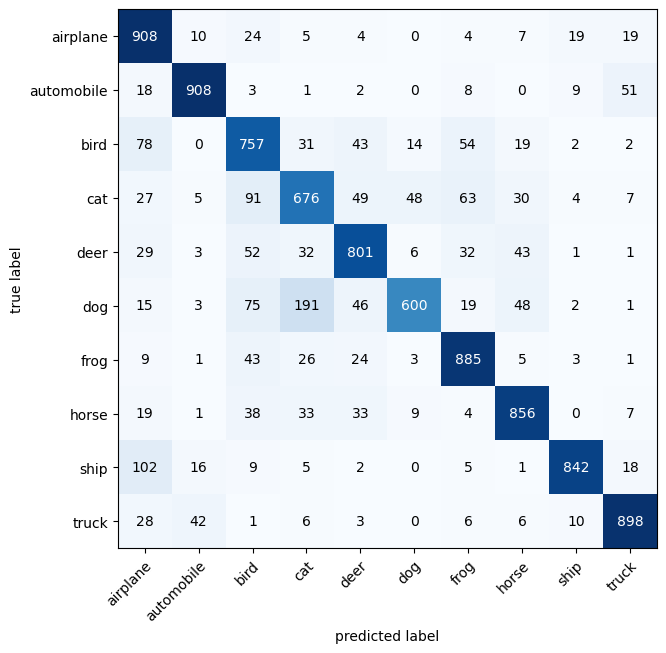

In [44]:
from tqdm.auto import tqdm
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 1. Make predictions with trained model
y_preds = []
y_trues = []

model_4.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        # Send data and targets to target device
        X, y = X.to(device), y.to(device)
        # Forward pass (logits)
        y_logit = model_4(X)
        # Get predicted classes
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        # Collect predictions and true labels (always on CPU)
        y_preds.append(y_pred.cpu())
        y_trues.append(y.cpu())

# 2. Concatenate all predictions and true labels into Tensors
y_pred_tensor = torch.cat(y_preds)
y_true_tensor = torch.cat(y_trues)

# 3. Confusion matrix calculation
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(y_pred_tensor, y_true_tensor)

# 4. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)
